In [165]:
#libraries
import h5py
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
import astropy.constants as const
import astropy.units as u

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    'font.size': 30,         #tamaño de fuente general
    'axes.titlesize': 30,    #tamaño de fuente para títulos de ejes
    'axes.labelsize': 30,    #tamaño de fuente para etiquetas de ejes
    'xtick.labelsize': 30,   #tamaño de fuente para etiquetas del eje x
    'ytick.labelsize': 30,   #tamaño de fuente para etiquetas del eje y
    'legend.fontsize': 30,   #tamaño de fuente para la leyenda
    'figure.titlesize': 30   #tamaño de fuente para el título de la figura
})

plt.style.use(['science', 'grid'])

In [166]:
#simulation units
G = 1 #gravity constant
len_sim = 1 #length of simulation in parsec
mass_unit = 1 #mass unit in solar masses
T_sim = 14.9 * np.sqrt((len_sim**3)/mass_unit) #time unit conversion in Myr
vel_sim = 980.4 * (len_sim/(T_sim*1000)) #velocity unit conversion in m/s
print(f'Simulation Time: {T_sim}. Simulation Velocity: {vel_sim}.')

Simulation Time: 14.9. Simulation Velocity: 0.0657986577181208.


In [167]:
#enclosed mass NFW
m_200 = (((5*(10**14))*u.Msun ).to('kg')).value #pasamos masas solares a kg
rho_crit = (9.8*10**(-27)) #kg/m^3
r_200 = ((((3*m_200/(4*np.pi*200*rho_crit))**(1/3)) * u.meter).to('pc')).value

print(r_200)

1603343.3423685066


In [168]:
#initial conditions
x, y, z = r_200/len_sim, 0/len_sim, 0/len_sim
r = np.sqrt(x*x + y*y + z*z)
vx, vy, vz = 0/vel_sim, 100/vel_sim, 0/vel_sim

N_steps = 10**5
t_orbit = (1*10**3)/T_sim #1 Gyr en cruzar un cumulo
t_end = 100*t_orbit #cantidad de orbitas que daria

t, dt = 0, t_end/N_steps

In [169]:
#orbit simulation
x_arr, y_arr, z_arr = np.ones(N_steps, dtype = float), np.ones(N_steps, dtype = float), np.ones(N_steps, dtype = float)
vx_arr, vy_arr, vz_arr = np.ones(N_steps, dtype = float), np.ones(N_steps, dtype = float), np.ones(N_steps, dtype = float)
t_arr = np.ones(N_steps, dtype = float)
r_arr = np.ones(N_steps, dtype = float)
for i in range(0, N_steps):

    x_arr[i], y_arr[i], z_arr[i] = x, y, z
    vx_arr[i], vy_arr[i], vz_arr[i] = vx, vy, vz
    
    r = np.sqrt(x*x + y*y + z*z)
    r_arr[i] = r
    
    c = 4
    s = r/(r_200)
    g_c = 1/ ( np.log(1+c) - (c/(1+c)) )
    m_NFW = ((5*10**14)/mass_unit) * g_c * ( np.log(1 + (c*s)) - ( (c*s)/(1 + c*s) ) )
    
    ax, ay, az = (-(G*m_NFW)/(r**2))*(x/r), (-(G*m_NFW)/(r**2))*(y/r), (-(G*m_NFW)/(r**2))*(z/r)
    vx, vy, vz = vx + ax*dt, vy + ay*dt, vz + az*dt
    x, y, z = x + vx*dt, y + vy*dt, z + vz*dt
    t_arr[i] = t 
    t = i*dt

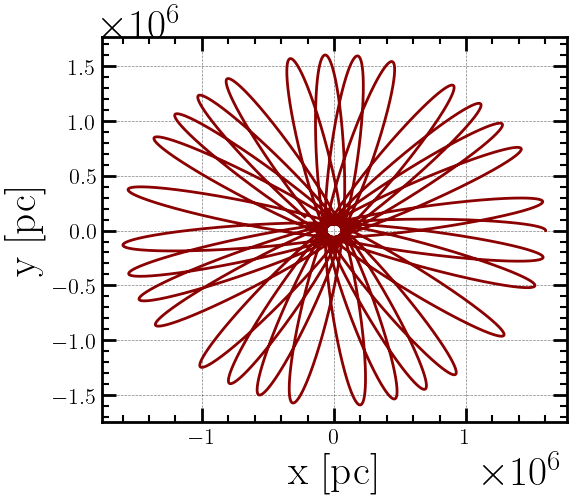

In [170]:
#radius precision
fig = plt.figure(figsize = (6,5))
gs = fig.add_gridspec()
ax = gs.subplots()

for i in range(0, 1):
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.tick_params(axis='both', which='major', labelsize=16, length=10, width=2)
    ax.tick_params(axis='both', which='minor', length=5, width=1.5)
    ax.minorticks_on()
    
ax.plot(x_arr, y_arr, color = 'darkred', lw = 2)
ax.set_xlabel('x [pc]')
ax.set_ylabel('y [pc]')

plt.show()